In [144]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

os.chdir("/Users/davidcoope/Desktop/BayesianOptimiser")
import BOPackage

In [145]:
def BraninHoo(X):

    x1 = X[:, 0]
    x2 = X[:, 1]
    
    # Calculate the function value
    y = (x2 - (5.1 / (4 * np.pi ** 2)) * x1 ** 2 + (5 / np.pi) * x1 - 6) ** 2
    y += 10 * (1 - (1 / (8 * np.pi))) * np.cos(x1) + 10

    # Add the constraint
    constraint = (x1 - 2.5) ** 2 + (x2 - 7.5) ** 2 - 50 >= 0
    y[constraint] = 200  # Apply penalty for constraint violation
        
    # Make function negative to find the minimum
    y = -y.reshape(-1,1)

    return y

length_scale = 4
bounds = np.array([[-5, 10], [0, 15]])


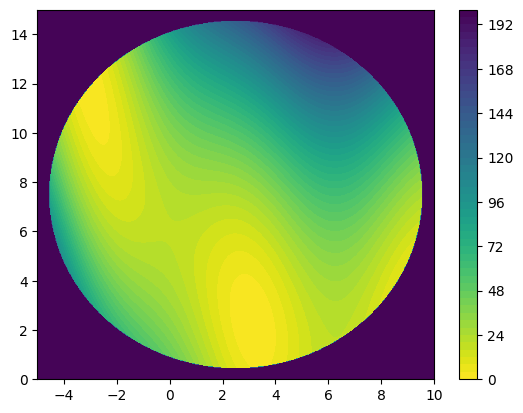

In [158]:
X1 = np.linspace(-5, 10, 501, endpoint=True)
X2 = np.linspace(0, 15, 501, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.c_[X1_grid.ravel(), X2_grid.ravel()]

result = -BraninHoo(candidate_x).reshape(X1_grid.shape)

# Plot the contour
contour = plt.contourf(X1, X2, result, levels=50, cmap='viridis_r')

# Add a color bar
plt.colorbar(contour)

# Show the plot
plt.show()

In [147]:
"""
Configure the optimiser.
"""
ObjectiveFunction = BraninHoo

random_seed = 50

Kernel = BOPackage.RBF_Kernel

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 1
min_kappa = 0.05

acquisition_samples = 100
reduce_bounds_factor = 0.5

# log_path = '/Users/davidcoope/Desktop/BayesianOptimiser/BraninHoo/BOlog.log'

# if os.path.exists(log_path):   
#     subprocess.run(['rm', '-rf', log_path], check=True, text=True, capture_output=True)  

In [148]:
"""
Configure the optimiser for the standard configuration.
"""

dynamic_bounds = False

# Create the object
bo1 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=None,
                  first_reduce_bounds=None,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo1.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo1.UpdateData(raw_X, raw_y)

for i in range(299):
    raw_X = bo1.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo1.UpdateData(raw_X, raw_y)

bo1.PrintCurrentStatus()
print(bo1.bounds)
# BOPackage.PlotData(bo1)

BO1 = bo1.BestData()[1][0]

Current best y value was [-0.41591642]; the corresponding X values were [3.1895478  2.15429137]
[[-5 10]
 [ 0 15]]


In [149]:
"""
Configure the optimiser with bounds.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 30
first_reduce_bounds = 100  

# Create the object
bo2 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo2.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo2.UpdateData(raw_X, raw_y)

for i in range(299):
    raw_X = bo2.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo2.UpdateData(raw_X, raw_y)

bo2.PrintCurrentStatus()
print(bo2.bounds)
# BOPackage.PlotData(bo2)

BO2 = bo2.BestData()[1][0]

Current best y value was [-0.39819369]; the corresponding X values were [3.14952603 2.2708621 ]
The bounds have been reduced 4 times
[[2.68077603 3.61827603]
 [1.8021121  2.7396121 ]]


In [150]:
"""
Configure the optimiser with batch sampling.
"""

dynamic_bounds = False

# Create the object
bo3 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo3.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo3.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo3.GetNextXBatch(10, sub_batch_size=10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo3.UpdateData(raw_X, raw_y)

bo3.PrintCurrentStatus()
print(bo3.bounds)
# BOPackage.PlotData(bo3)

BO3 = bo3.BestData()[1][0]

Current best y value was [-0.63441095]; the corresponding X values were [2.92132831 2.38570826]
[[-5 10]
 [ 0 15]]


In [151]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo6 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo6.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo6.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo6.GetNextXBatch(10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo6.UpdateData(raw_X, raw_y)

bo6.PrintCurrentStatus()
print(bo6.bounds)
# BOPackage.PlotData(bo5)

BO6 = bo6.BestData()[1][0]

Current best y value was [-0.39873666]; the corresponding X values were [3.14554444 2.29974691]
The bounds have been reduced 5 times
[[2.91116944 3.37991944]
 [2.06537191 2.53412191]]


In [152]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo4 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo4.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo4.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo4.UpdateData(raw_X, raw_y)

bo4.PrintCurrentStatus()
print(bo4.bounds)
# BOPackage.PlotData(bo4)

BO4 = bo4.BestData()[1][0]

Current best y value was [-0.41591642]; the corresponding X values were [3.1895478  2.15429137]
[[-5 10]
 [ 0 15]]


In [153]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo5 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo5.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo5.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo5.GetNextXBatch(10, sub_batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo5.UpdateData(raw_X, raw_y)
    

bo5.PrintCurrentStatus()
print(bo5.bounds)
# BOPackage.PlotData(bo5)

BO5 = bo5.BestData()[1][0]

Current best y value was [-0.39916477]; the corresponding X values were [3.15704218 2.25151598]
The bounds have been reduced 4 times
[[2.70029255 3.63779255]
 [1.74736309 2.68486309]]


In [154]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo7 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo7.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo7.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo7.UpdateData(raw_X, raw_y)

bo7.PrintCurrentStatus()
print(bo7.bounds)
# BOPackage.PlotData(bo4)

BO7 = bo7.BestData()[1][0]

Current best y value was [-0.41591642]; the corresponding X values were [3.1895478  2.15429137]
[[-5 10]
 [ 0 15]]


In [155]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo8 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo8.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo8.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo8.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo8.UpdateData(raw_X, raw_y)
    

bo8.PrintCurrentStatus()
print(bo8.bounds)
# BOPackage.PlotData(bo5)

BO8 = bo8.BestData()[1][0]

Current best y value was [-0.39988983]; the corresponding X values were [3.15897014 2.23797746]
The bounds have been reduced 6 times
[[3.04178264 3.27615764]
 [2.12078996 2.35516496]]


In [156]:
print(BO1, BO2, BO3, BO6, BO4, BO5, BO7, BO8)

[-0.41591642] [-0.39819369] [-0.63441095] [-0.39873666] [-0.41591642] [-0.39916477] [-0.41591642] [-0.39988983]
